In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [108]:
median_household_income = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-MedianHouseholdIncome2015.csv', encoding="windows-1252")
over_25_completed_hs = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
people_below_poverty = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentagePeopleBelowPoverty.csv', encoding="windows-1252")
race_by_city = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-ShareRaceByCity.csv', encoding="windows-1252")
police_killing_US = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PoliceKillingsUS.csv', encoding="windows-1252")
demographic = pd.read_csv('/content/drive/My Drive/data/cleaned-data/demographic.csv', encoding="windows-1252")
combined = pd.read_csv('/content/drive/My Drive/data/cleaned-data/combined.csv', encoding="windows-1252")
police_killing_us = pd.read_csv('/content/drive/My Drive/data/cleaned-data/police_killing_us.csv', encoding="windows-1252")

In [109]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29132 non-null  object 
 1   city                   29132 non-null  object 
 2   percent_completed_hs   29132 non-null  float64
 3   poverty_rate           29125 non-null  float64
 4   Median Income          27383 non-null  float64
 5   share_white            28930 non-null  float64
 6   share_black            28930 non-null  float64
 7   share_native_american  28930 non-null  float64
 8   share_asian            28930 non-null  float64
 9   share_hispanic         28930 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


In [110]:
demographic.describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29132.000000,29125.000000,27383.000000,28930.000000,28930.000000,28930.000000,28930.000000,28930.000000
mean,85.733805,16.444045,51177.670672,83.190149,6.882655,2.856685,1.547159,9.203426
std,11.875153,13.176623,24887.873873,21.649996,15.673815,12.627056,4.293338,17.269697
min,0.000000,0.000000,4511.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,7.100000,35625.000000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,88.400000,13.700000,45305.000000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,93.500000,22.500000,59482.000000,96.900000,4.300000,0.900000,1.200000,8.000000
max,100.000000,100.000000,244083.000000,100.000000,100.000000,100.000000,67.100000,100.000000




*   85.7% of people over 25 completed high school
*   Average median income is 51177
*   16.4% of people are in poverty


In [111]:
m_white = 83.190149
m_black = 6.882655
m_share_native_american = 2.856685
m_share_asian = 1.547159
m_share_hispanic = 9.203426
m_white + m_black + m_share_native_american + m_share_asian + m_share_hispanic

103.68007399999999

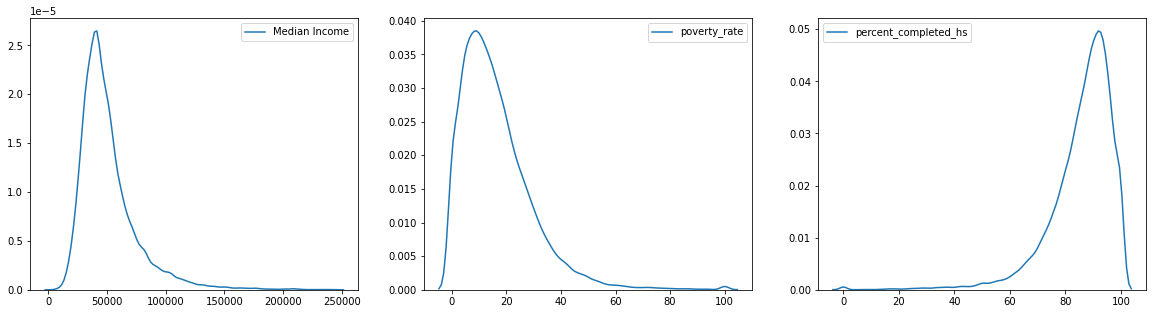

In [112]:
#demographic = demographic.dropna()
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(demographic['Median Income'], ax=ax[0])
sns.kdeplot(demographic['poverty_rate'], ax=ax[1])
sns.kdeplot(demographic['percent_completed_hs'], ax=ax[2])

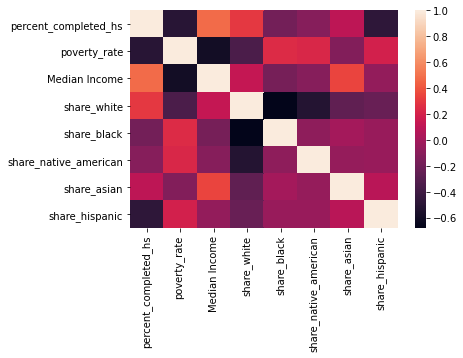

In [113]:
sns.heatmap(demographic.corr())

In [114]:
police_killing_us['date'] = pd.to_datetime(police_killing_us['date'], format='%d/%m/%y')

In [115]:
police_killing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

In [116]:
police_killing_us['date'].sort_values()

0      2015-01-02
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-04
          ...    
2249   2017-07-25
2250   2017-07-26
2251   2017-07-27
2252   2017-07-31
2253   2017-07-31
Name: date, Length: 2254, dtype: datetime64[ns]

The data was collected from 2015-01-02 till 2017-07-31

<Figure size 720x360 with 0 Axes>

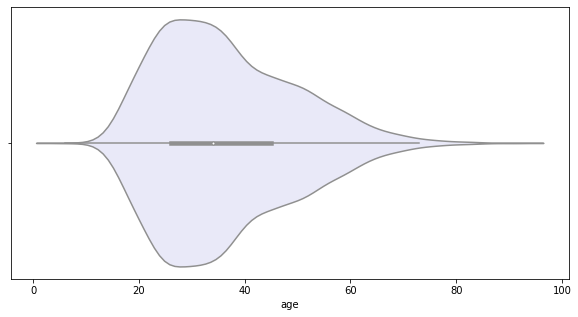

In [117]:
plt.figure(figsize=(10,5))
sns.violinplot(x=police_killing_us['age'],color='lavender')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


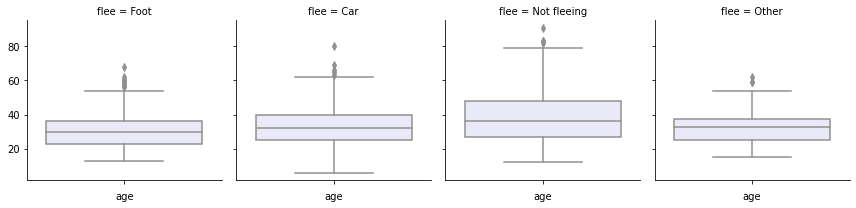

In [118]:
grid = sns.FacetGrid(police_killing_us,col='flee',col_order=['Foot','Car','Not fleeing','Other'])
grid.map(sns.boxplot, 'age', orient='vertical', color='lavender')

Text(0.5, 1.0, 'Average age for each gender and race')

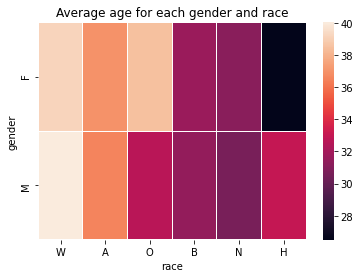

In [119]:
a=pd.pivot_table(data=police_killing_us, values='age', index='gender', columns='race')
a=a.reindex(columns=['W','A','O','B','N','H'])
plt.title('Average age for each gender and race')
sns.heatmap(a, mask=a.isnull(), linewidth=0.01, linecolor='white')

!Note:

*   W: White (Hispanic + Non-Hispanic)
*   A: Asian (Hispanic + Non-Hispanic)
*   B: Black (Hispanic + Non-Hispanic)
*   H: Hispanic
*   O: White (Non-Hispanic)
*   N: Black (Non-Hispanic)

 TODO: WORK ON THE RACE



share_asian               1.547159
share_native_american     2.856685
share_black               6.882655
share_hispanic            9.203426
share_white              83.190149
dtype: float64

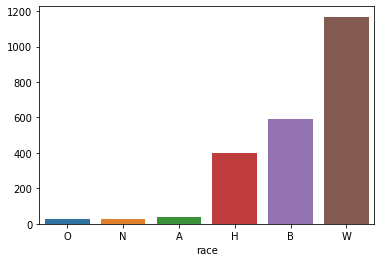

In [120]:
a=police_killing_us.groupby('race').size().sort_values()
demographic[['share_white','share_black','share_native_american','share_asian','share_hispanic']].mean().sort_values()
sns.barplot(x=a.index, y=a)

<Figure size 1440x360 with 0 Axes>

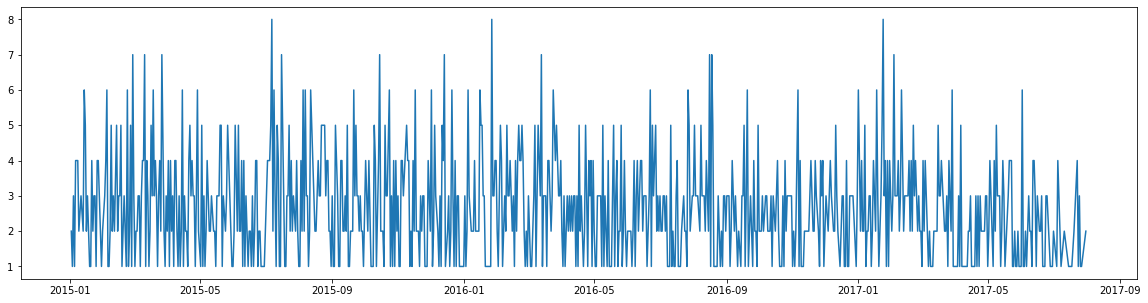

In [ ]:
a = police_killing_us.groupby('date').size()
plt.figure(figsize=(20,5))
sns.lineplot(data=a)

Time and total death are not correlated

<Figure size 1440x360 with 0 Axes>

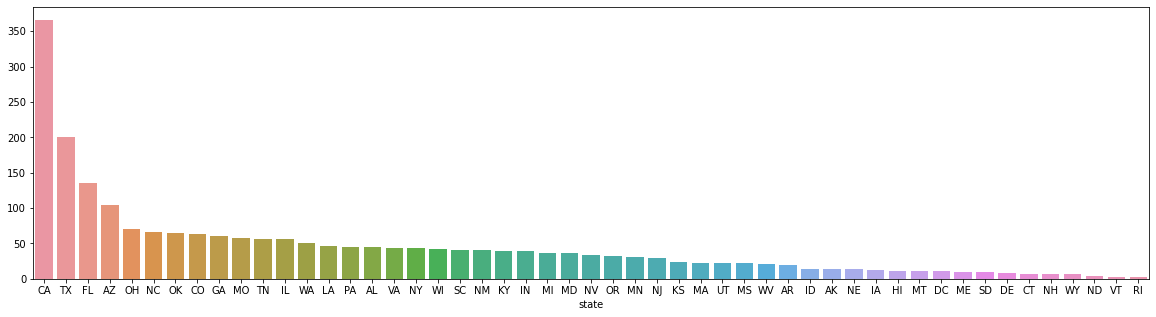

In [169]:
##### need to divide by each state's polulation
a = police_killing_us.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x = a.index, y = a)

CA, TX, FL and have most police killing cases